In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("bank-additional.csv", delimiter=";")

# Drop irrelevant columns
data = data.drop(["duration"], axis=1)

# Replace unknown values with NaN
data = data.replace("unknown", np.nan)
print(data.tail())
# Convert categorical variables to numerical
data["job"] = data["job"].astype("category").cat.codes
data["marital"] = data["marital"].astype("category").cat.codes
data["contact"] = data["contact"].astype("category").cat.codes
data["education"] = data["education"].astype("category").cat.codes
data["default"] = data["default"].astype("category").cat.codes
data["housing"] = data["housing"].astype("category").cat.codes
data["loan"] = data["loan"].astype("category").cat.codes
data["contact"] = data["contact"].astype("category").cat.codes
data["month"] = data["month"].astype("category").cat.codes
data["poutcome"] = data["poutcome"].astype("category").cat.codes
data["day_of_week"] = data["day_of_week"].astype("category").cat.codes
data["y"] = data["y"].astype("category").cat.codes

# Impute missing values with column means
data = data.fillna(data.mean())

# Split into features and target
x = data.drop(["y"], axis=1)
y = data["y"]

      age         job  marital    education default housing loan    contact  \
4114   30      admin.  married     basic.6y      no     yes  yes   cellular   
4115   39      admin.  married  high.school      no     yes   no  telephone   
4116   27     student   single  high.school      no      no   no   cellular   
4117   58      admin.  married  high.school      no      no   no   cellular   
4118   34  management   single  high.school      no     yes   no   cellular   

     month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
4114   jul         thu         1    999         0  nonexistent           1.4   
4115   jul         fri         1    999         0  nonexistent           1.4   
4116   may         mon         2    999         1      failure          -1.8   
4117   aug         fri         1    999         0  nonexistent           1.4   
4118   nov         wed         1    999         0  nonexistent          -0.1   

      cons.price.idx  cons.conf.idx  euribor

In [3]:
# summary of data
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,3.711338,1.166303,3.455936,-0.194707,0.502549,0.135955,0.356154,4.294975,2.009711,2.537266,960.422190,0.190337,0.924253,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,3.567288,0.609358,2.240936,0.396636,0.548680,0.410482,0.478920,2.305188,1.389233,2.568159,191.922786,0.541788,0.372816,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,35.000000,999.000000,6.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


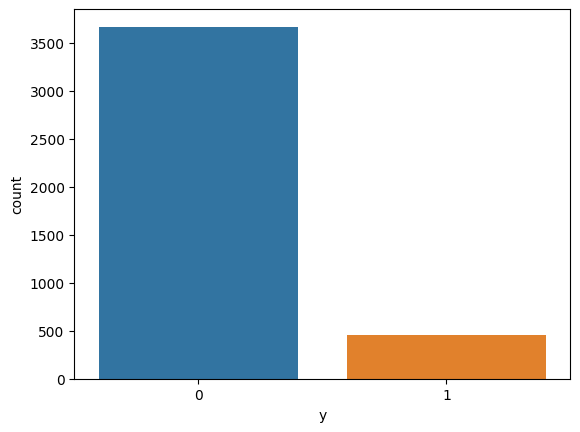

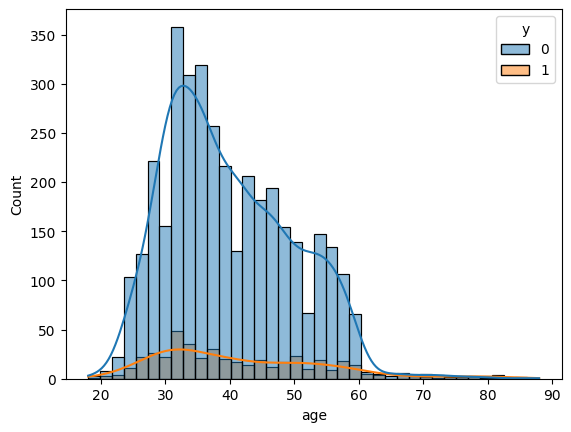

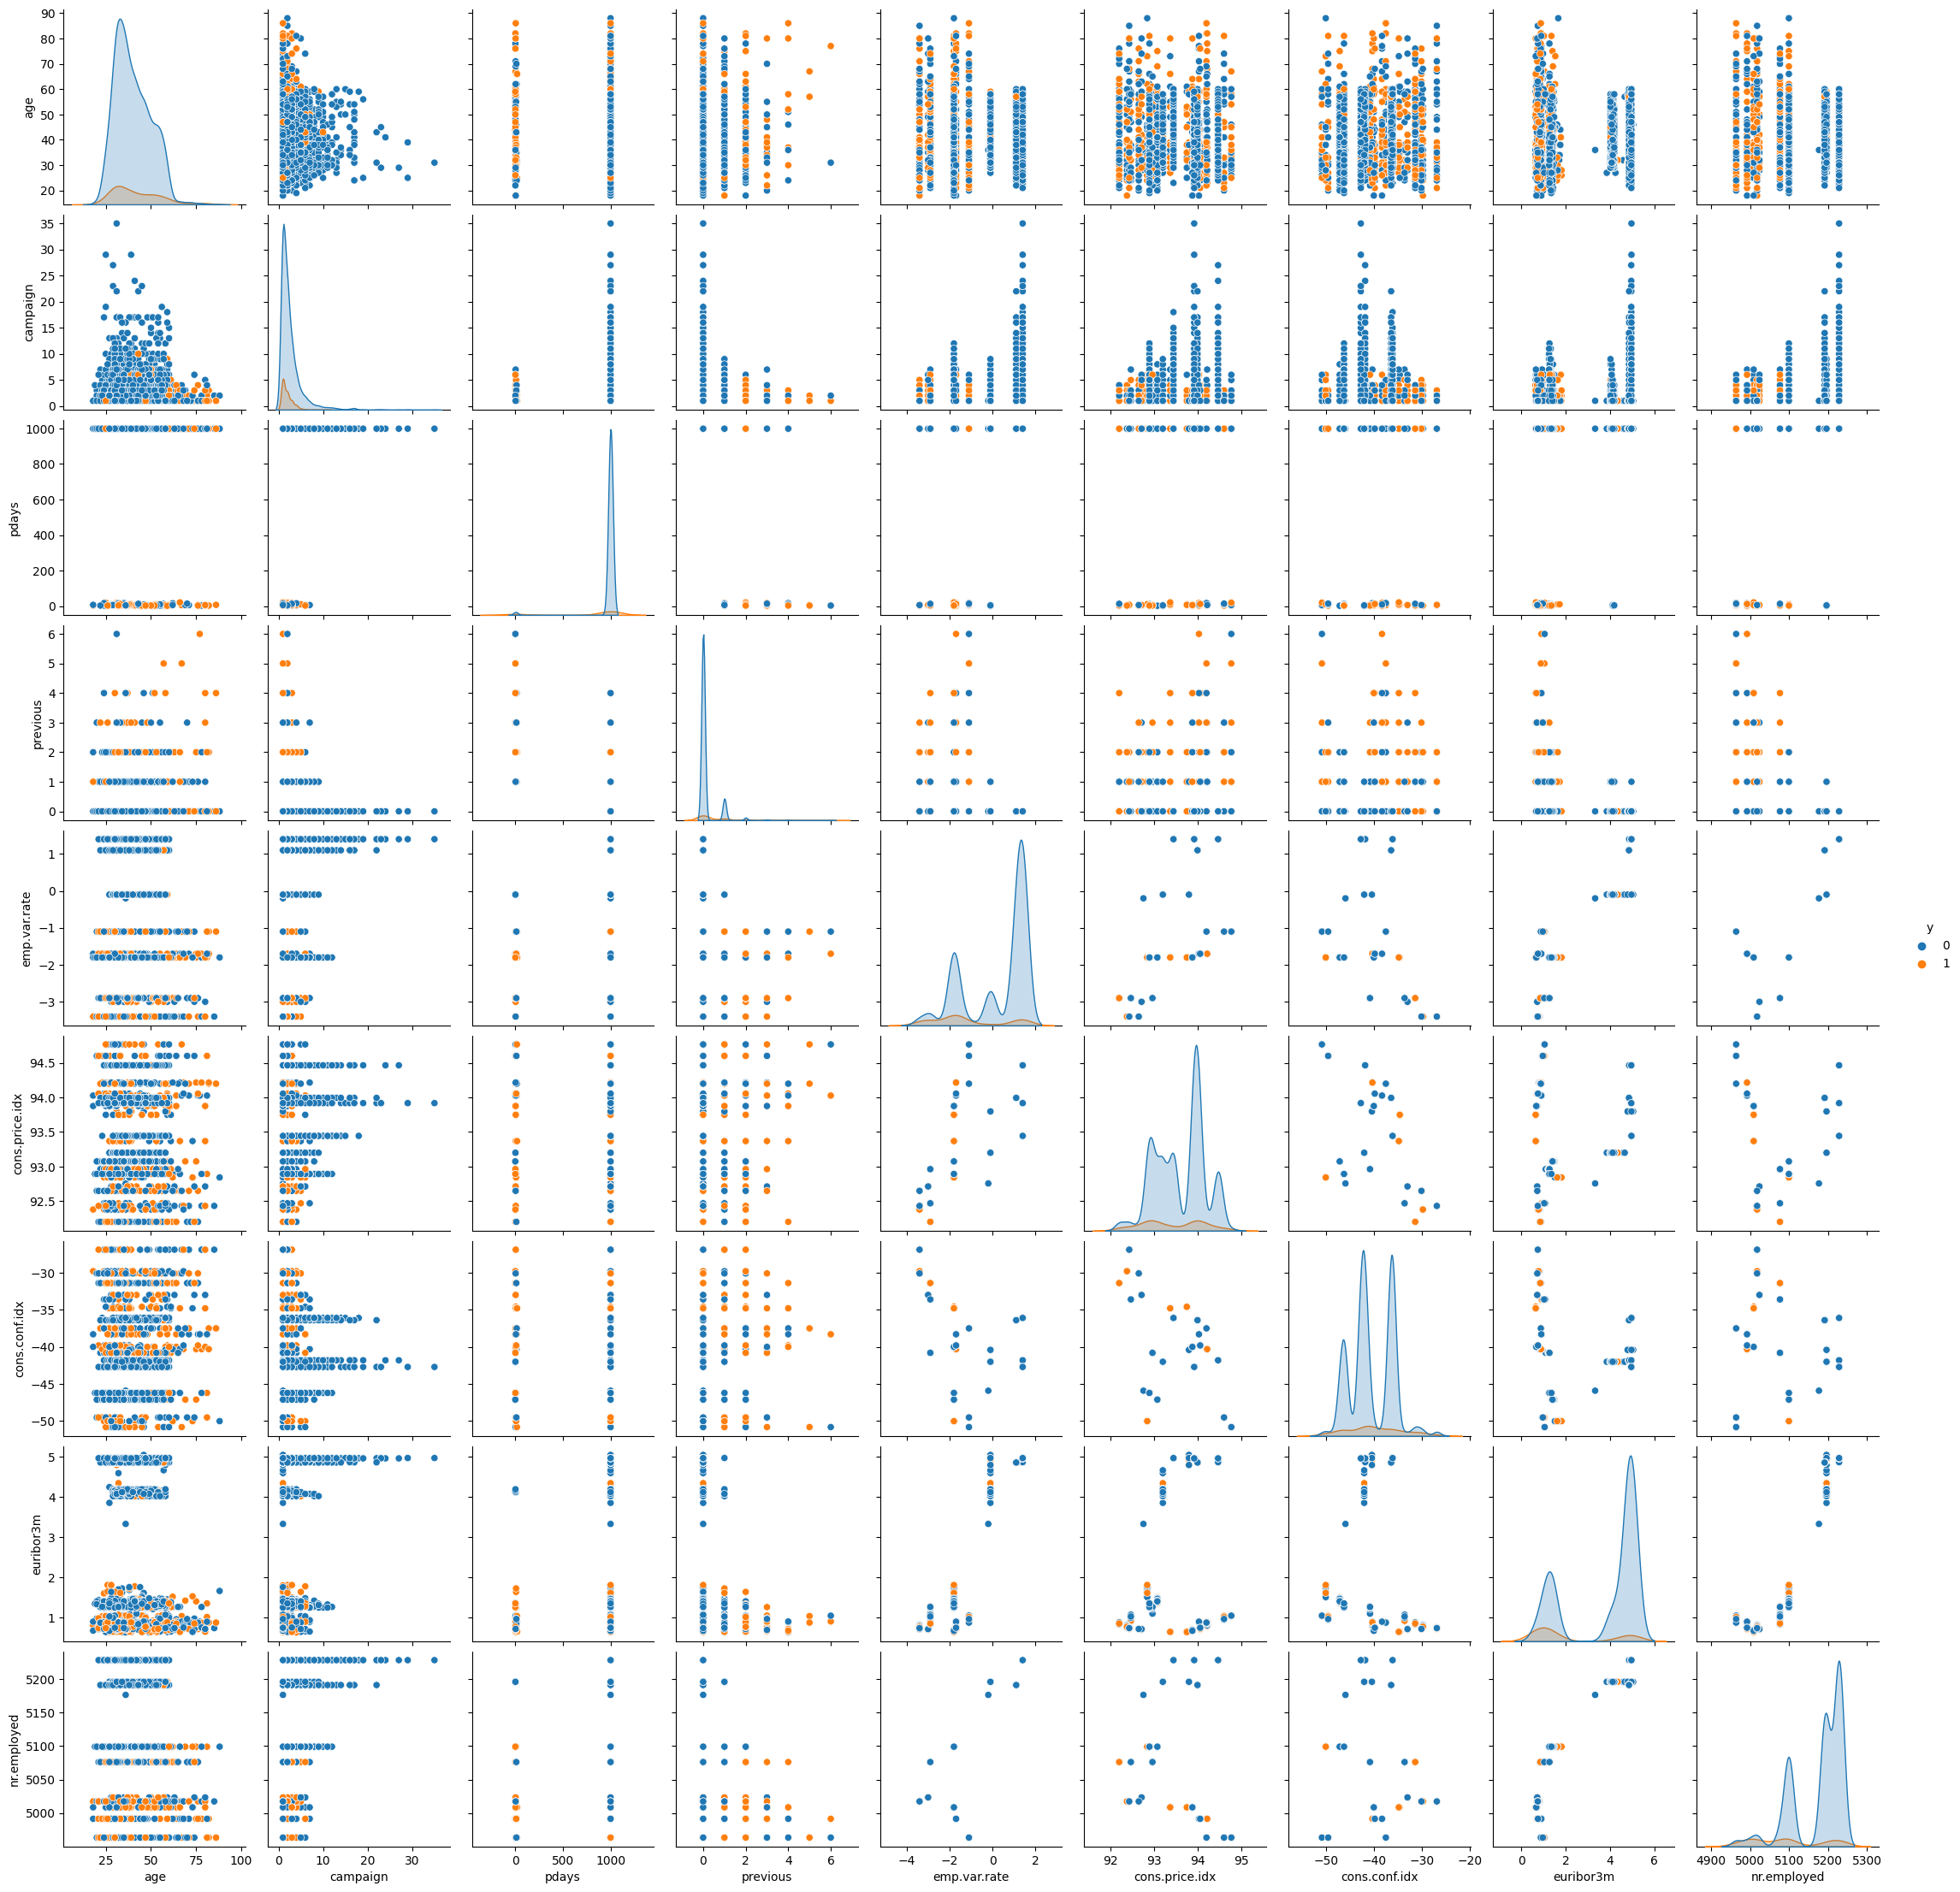

In [4]:
# Data visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=data)
plt.show()

sns.histplot(data=data, x="age", hue="y", kde=True)
plt.show()

sns.pairplot(data, vars=["age", "campaign", "pdays", "previous", "emp.var.rate","cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"], hue="y")
plt.show()

In [5]:
#Value Counts of Categorical Variables
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "day_of_week"]

for var in cat_vars:
    print(data[var].value_counts())

 0     1012
 1      884
 9      691
 7      393
 4      324
 5      166
 6      159
 2      148
 10     111
 3      110
 8       82
-1       39
Name: job, dtype: int64
 1    2509
 2    1153
 0     446
-1      11
Name: marital, dtype: int64
 6    1264
 3     921
 2     574
 5     535
 0     429
 1     228
-1     167
 4       1
Name: education, dtype: int64
 0    3315
-1     803
 1       1
Name: default, dtype: int64
 1    2175
 0    1839
-1     105
Name: housing, dtype: int64
 0    3349
 1     665
-1     105
Name: loan, dtype: int64
0    2652
1    1467
Name: contact, dtype: int64
6    1378
3     711
1     636
4     530
7     446
0     215
8      69
9      64
5      48
2      22
Name: month, dtype: int64
1    3523
0     454
2     142
Name: poutcome, dtype: int64
2    860
1    855
3    841
4    795
0    768
Name: day_of_week, dtype: int64


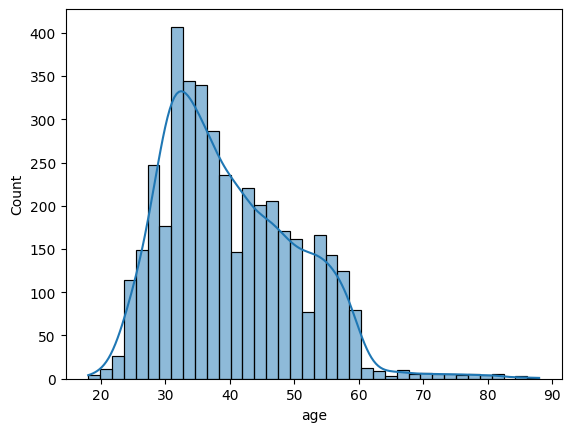

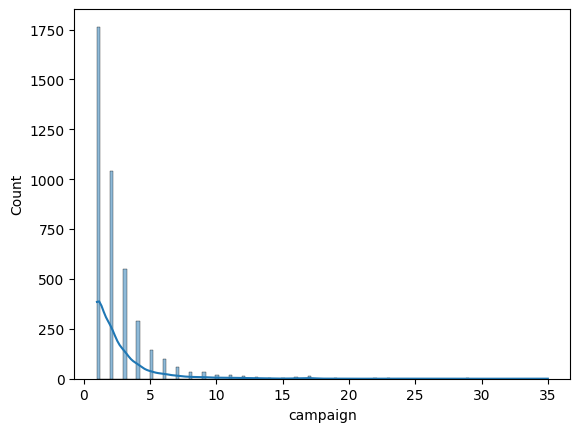

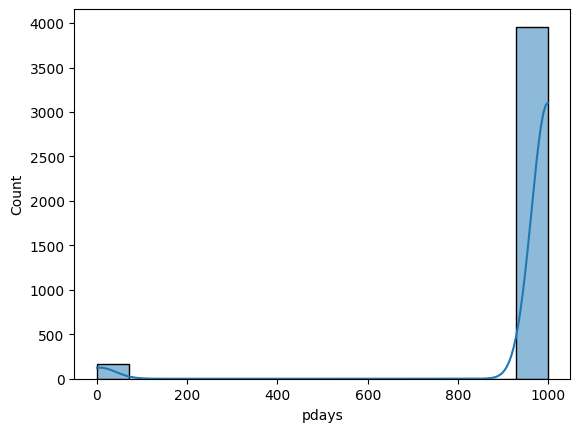

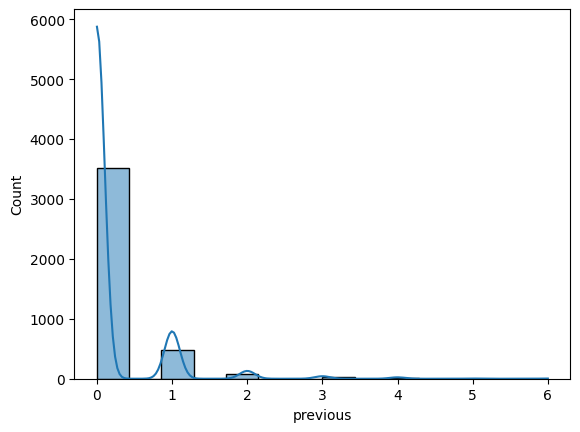

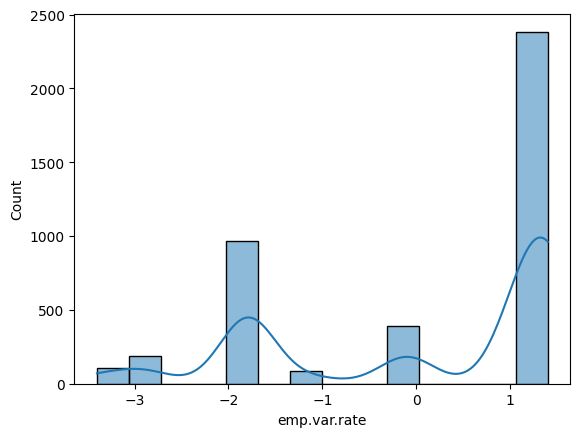

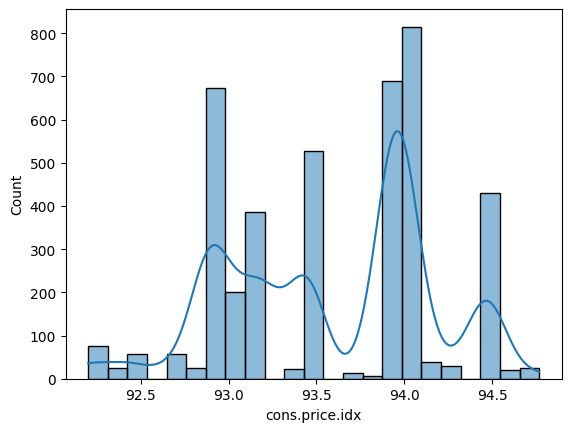

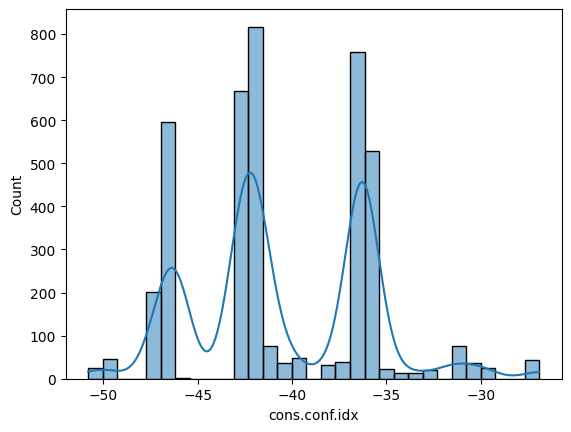

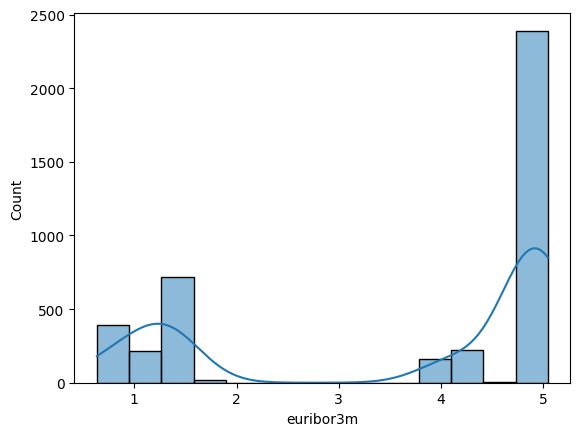

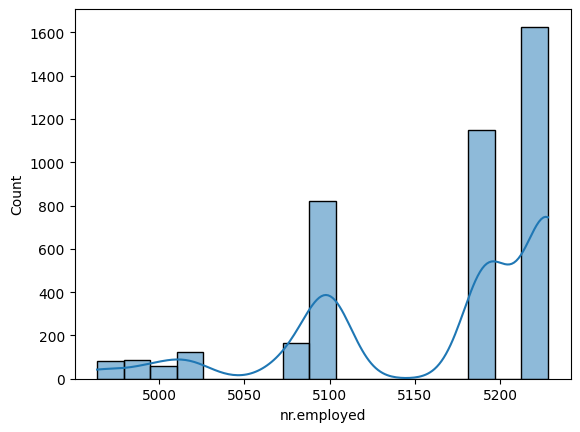

In [6]:
#Distribution of Numeric Variables
numeric_vars = ["age", "campaign", "pdays", "previous", "emp.var.rate","cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]

for var in numeric_vars:
    sns.histplot(data[var], kde=True)
    plt.show()

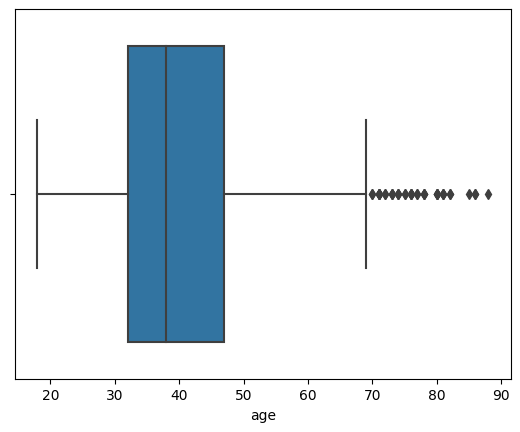

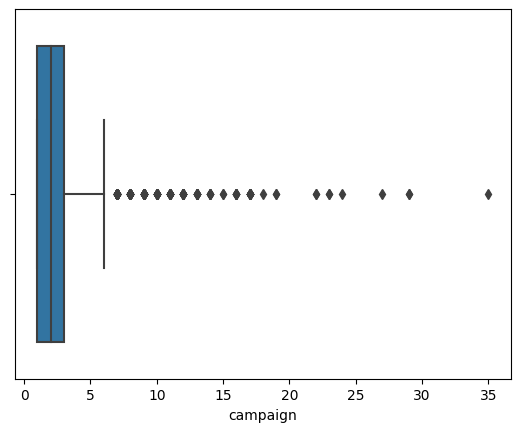

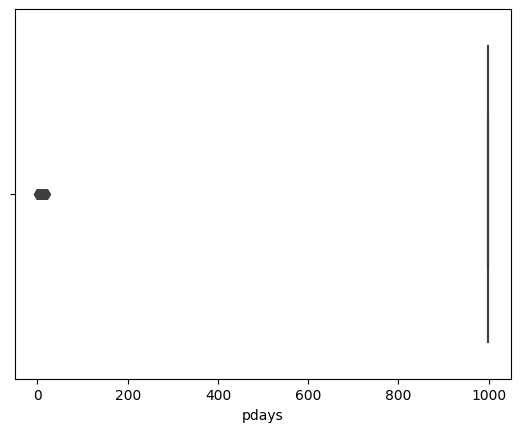

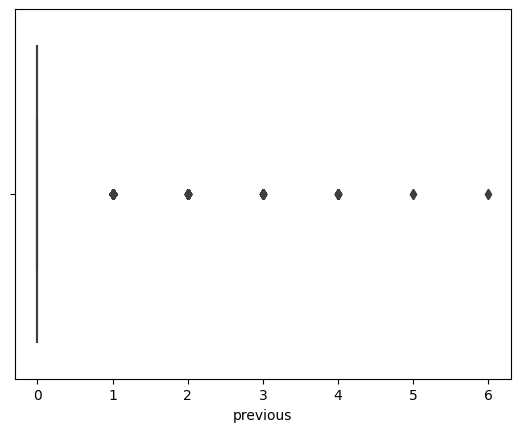

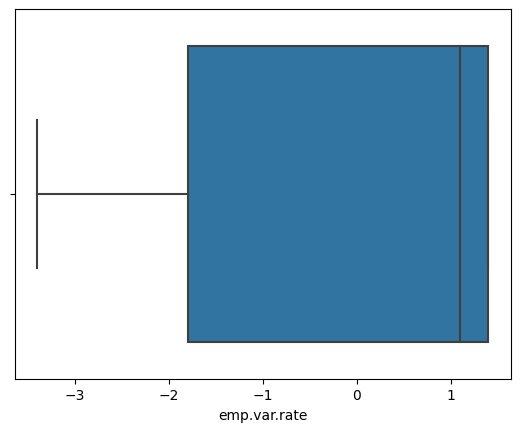

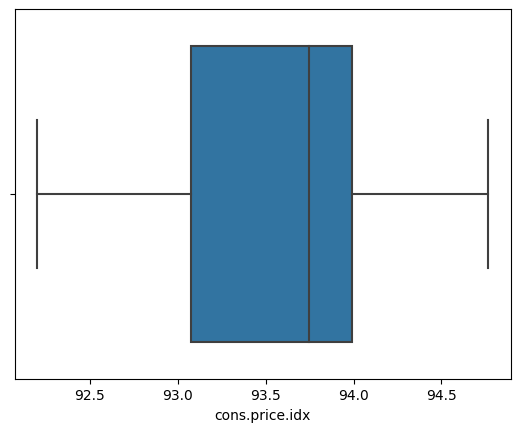

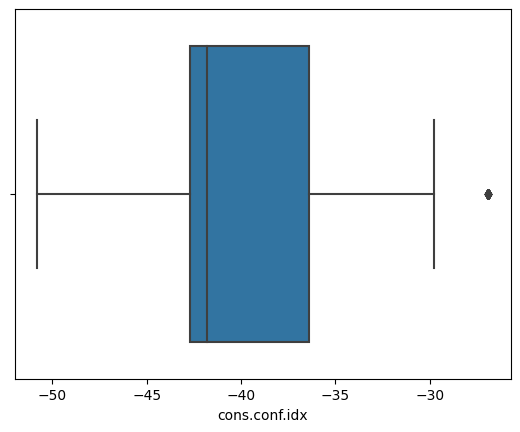

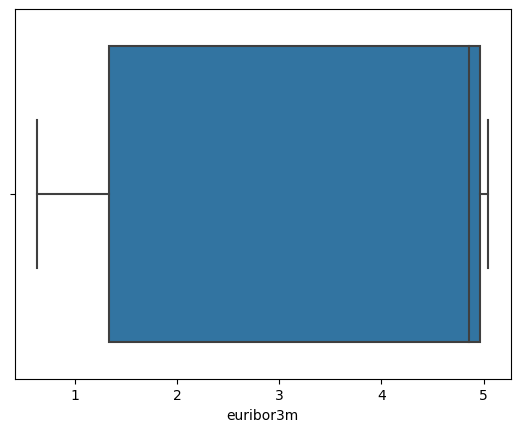

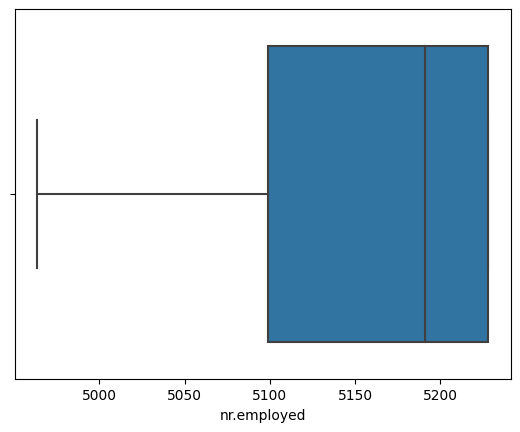

In [7]:
#Outlier Detection
for var in numeric_vars:
    sns.boxplot(x=data[var])
    plt.show()

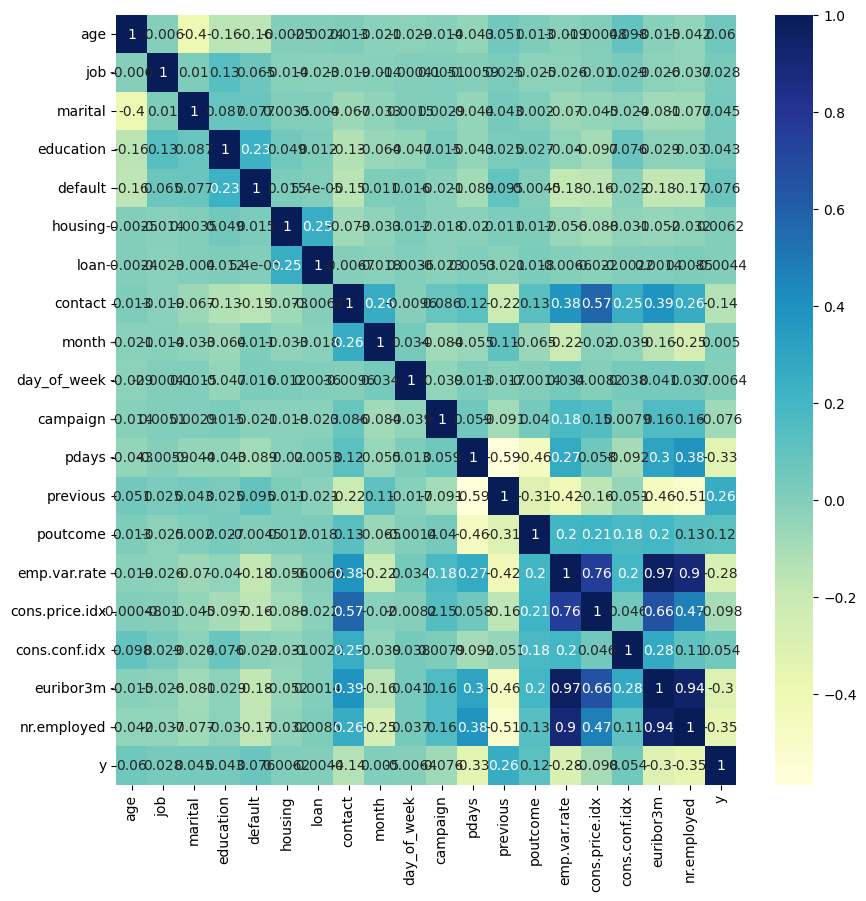

In [8]:
# feature selection, heatmap 
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", ax=ax)
plt.show()


Feature: age, Score: 0.15972
Feature: job, Score: 0.08113
Feature: marital, Score: 0.04007
Feature: education, Score: 0.07044
Feature: default, Score: 0.01704
Feature: housing, Score: 0.03519
Feature: loan, Score: 0.02307
Feature: contact, Score: 0.01534
Feature: month, Score: 0.02334
Feature: day_of_week, Score: 0.06249
Feature: campaign, Score: 0.06618
Feature: pdays, Score: 0.04044
Feature: previous, Score: 0.02296
Feature: poutcome, Score: 0.04012
Feature: emp.var.rate, Score: 0.01884
Feature: cons.price.idx, Score: 0.03298
Feature: cons.conf.idx, Score: 0.03421
Feature: euribor3m, Score: 0.14663
Feature: nr.employed, Score: 0.06981


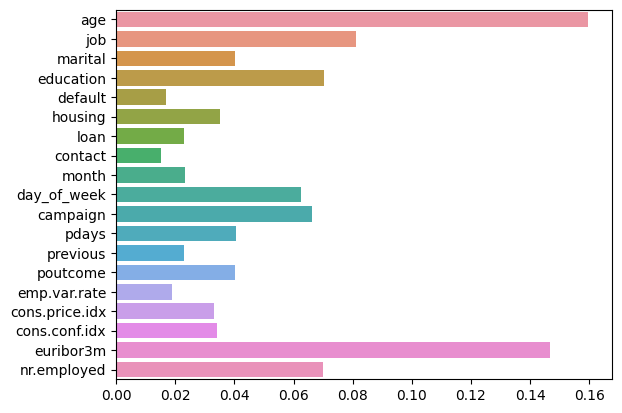

In [9]:
# feature importance visuallization
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x, y)

importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (x.columns[i],v))
    
sns.barplot(x=importance, y=x.columns)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier




class Models():

        def get_random_forest_model(self):
          return RandomForestClassifier(n_estimators=100, random_state=2)

        def get_svm_model(self):
          return SVC(kernel='linear', C=0.1, random_state=2)

        def get_xgboost_model(self):
          return XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=2)

        def get_decision_tree_model(self):
          return DecisionTreeClassifier(random_state=2)

In [11]:
# split data and normalizing them
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
scaler = StandardScaler()

# fit scaler on x_train
scaler.fit(x_train)

# transform x_train and x_test using scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = Models()

# Create a list of models to evaluate
model_list = [models.get_random_forest_model(), models.get_svm_model(), models.get_xgboost_model(), models.get_decision_tree_model()]

# Evaluate each model using cross-validation
for model in model_list:
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    print("Model:", type(model).__name__)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))

# Select the best model based on evaluation metrics on test set
best_model = None
best_score = 0

for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Update best model
    if f1 > best_score:
        best_model = model
        best_score = f1

print("Best Model:", type(best_model).__name__)
print("Best F1 Score:", best_score)

Model: RandomForestClassifier
CV Scores: [0.90288316 0.88770865 0.89681335 0.89377845 0.8892261 ]
Mean CV Score: 0.894081942336874
Model: SVC
CV Scores: [0.90288316 0.89377845 0.892261   0.90288316 0.8952959 ]
Mean CV Score: 0.8974203338391502
Model: XGBClassifier
CV Scores: [0.90440061 0.88467375 0.88163885 0.89074355 0.90440061]
Mean CV Score: 0.8931714719271625
Model: DecisionTreeClassifier
CV Scores: [0.82701062 0.82549317 0.82701062 0.83004552 0.83763278]
Mean CV Score: 0.8294385432473443
Model: RandomForestClassifier
Accuracy: 0.9065533980582524
Precision: 0.5952380952380952
Recall: 0.29411764705882354
F1 Score: 0.3937007874015749
Model: SVC
Accuracy: 0.9114077669902912
Precision: 0.6764705882352942
Recall: 0.27058823529411763
F1 Score: 0.3865546218487395
Model: XGBClassifier
Accuracy: 0.9016990291262136
Precision: 0.55
Recall: 0.25882352941176473
F1 Score: 0.3520000000000001
Model: DecisionTreeClassifier
Accuracy: 0.8228155339805825
Precision: 0.256
Recall: 0.3764705882352941
F1

In [13]:
# hyper parameter engineering
from sklearn.model_selection import GridSearchCV

models = Models()

# Define parameter grid for each model
rf_param_grid = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15]}
svm_param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
xgb_param_grid = {"learning_rate": [0.1, 0.2, 0.3], "max_depth": [5, 10, 15], "n_estimators": [50, 100, 200]}
dt_param_grid = {"max_depth": [5, 10, 15]}

# Create a list of parameter grids for each model
param_grid_list = [rf_param_grid, svm_param_grid, xgb_param_grid, dt_param_grid]

# Create a list of models to tune
model_list = [models.get_random_forest_model(), models.get_svm_model(), models.get_xgboost_model(), models.get_decision_tree_model()]

# Perform grid search for each model
best_models = []
for i in range(len(model_list)):
    grid_search = GridSearchCV(estimator=model_list[i], param_grid=param_grid_list[i], cv=5)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    print("Model:", type(best_model).__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)

# Select the best model based on evaluation metrics on test set
best_model = None
best_score = 0

for model in best_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Update best model
    if f1 > best_score:
        best_model = model
        best_score = f1

print("Best Model:", type(best_model).__name__)
print("Best F1 Score:", best_score)

Model: RandomForestClassifier
Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best CV Score: 0.896206373292868
Model: SVC
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best CV Score: 0.898330804248862
Model: XGBClassifier
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best CV Score: 0.8955993930197268
Model: DecisionTreeClassifier
Best Parameters: {'max_depth': 5}
Best CV Score: 0.8898330804248861
Model: RandomForestClassifier
Accuracy: 0.9089805825242718
Precision: 0.6785714285714286
Recall: 0.2235294117647059
F1 Score: 0.336283185840708
Model: SVC
Accuracy: 0.9053398058252428
Precision: 0.6060606060606061
Recall: 0.23529411764705882
F1 Score: 0.33898305084745767
Model: XGBClassifier
Accuracy: 0.9016990291262136
Precision: 0.5416666666666666
Recall: 0.3058823529411765
F1 Score: 0.39097744360902253
Model: DecisionTreeClassifier
Accuracy: 0.9101941747572816
Precision: 0.6896551724137931
Recall: 0.23529411764705882
F1 Score: 0.3508771929824561
Best Model: